## **Magic functions**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## **Required installation**

In [2]:
!pip install fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.7 MB/s eta 0:00:00


## **Necessary imports**

In [3]:
import os
import nltk
import numpy as np
import pandas as pd
from fastai import *
from fastbook import *
from fastai.vision.all import *

## **Mounting drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Folder initialization**

In [5]:
%cd /content/drive/MyDrive/artwork_description_generator/data/

images_path = 'images'
csv = "csvFiles/"

/content/drive/MyDrive/artwork_description_generator/data


## **Fetching csv files**

In [6]:
files = os.listdir(f'{csv}')
files

['Netherlands.csv', 'UnitedStates.csv', 'China.csv']

## **Merging and creation of the dataframe**

In [7]:
df = pd.DataFrame()
for file in files:
  data_frame = pd.read_csv(f"{csv}/{file}")
  df = pd.concat([df, data_frame], ignore_index = True)

## **Function to view shape**

In [8]:
def df_shape(df):
  print(f'Number of rows: {df.shape[0]}')
  print(f'Number of columns: {df.shape[1]}')

## **Viewing dataframe**

In [9]:
df.head()

,ids,artists,mediums,titles,descriptions,urls
0,nl_1,Piet Mondrian,Oil on canvas,"Lozenge Composition with Yellow, Black, Blue, Red, and Gray","Piet Mondrian, a painter of the revolutionary international movement De Stijl (the Style), argued that “the straight line tells the truth.” Why, then, we might wonder, would he choose to hang a painting off axis, where its edges imply dynamic diagonals? Among other motivations, rotating the canvas allowed Mondrian to reconsider a question he spent his career exploring, namely, the relationship between the contents of a painting and what contains them. In Lozenge Composition, the squared-off black lines imply enclosure, while a single line (above the blue area) extends to the slanted edge, ...",https://www.artic.edu/artworks/109819/lozenge-composition-with-yellow-black-blue-red-and-gray
1,nl_2,Jan Sanders van Hemessen,Oil on panel,Judith,"Judith was considered one of the most heroic women of the Old Testament. According to the biblical story, when her city was besieged by the Assyrian army, the beautiful young widow gained access to the quarters of the general Holofernes. After winning his confidence and getting him drunk, she took his sword and cut off his head, thereby saving the Jewish people. Although Judith was often shown richly and exotically clothed, Jan Sanders van Hemessen chose to present her as a monumental nude, aggressively brandishing her sword even after severing Holofernes’s head.Van Hemessen was one of the...",https://www.artic.edu/artworks/4575/judith
2,nl_3,Joachim Antonisz. Wtewael,Oil on copper,The Battle between the Gods and the Giants,"The subject of the victory of the gods of Olympus over the ancient race of giants provided Joachim Wtewael with the opportunity to depict exaggerated athletic poses and striking contrasts of space and light. From the clouds, the Olympian gods wield their attributes as weapons: Jupiter hurls thunderbolts; Neptune brandishes his triton; and Mercury uses his caduceus as a spear. The helmeted figure on the right is Minerva, the goddess of wisdom and war. The painting’s gemlike effect results from the use of a copper support and from its small scale. The artist’s self-conscious display of his s...",https://www.artic.edu/artworks/105466/the-battle-between-the-gods-and-the-giants
3,nl_4,Paulus Potter,Oil on panel,Two Cows and a Young Bull beside a Fence in a Meadow,"Paulus Potter, a prolific painter and etcher during his short life, elevated images of cows, oxen, and other domestic animals to majestic emblems of nature. His lavish attention to the physical appearances of such beasts—the varied texture and coloring of their hair, their characteristic poses, their bulky contours—borders on portraiture and likely derived from drawings he made from life. With Potter, animal painting blossomed into an independent genre in the Dutch Republic.",https://www.artic.edu/artworks/146953/two-cows-and-a-young-bull-beside-a-fence-in-a-meadow
4,nl_5,Pieter Jansz. Quast,Etching in black on paper,"Lame Beggar Asking for Alms, from T is al verwart-gaern (It’s already confusing)",NaN,https://www.artic.edu/artworks/81/lame-beggar-asking-for-alms-from-t-is-al-verwart-gaern-it-s-already-confusing


## **Checking NaN values**

In [10]:
df['titles'][:100]

0                          Lozenge Composition with Yellow, Black, Blue, Red, and Gray
1                                                                               Judith
2                                           The Battle between the Gods and the Giants
3                                 Two Cows and a Young Bull beside a Fence in a Meadow
4     Lame Beggar Asking for Alms, from T is al verwart-gaern (It’s already confusing)
                                            ...                                       
95                                          Wooded Landscape with Cottage and Horseman
96                                                        Jacob’s Farewell to Benjamin
97                                                                    Three Spheres II
98                                                              The Quick and the Dead
99                                                                       Drawing Hands
Name: titles, Length: 100, dtype: object

In [11]:
df.isna().sum()

ids                0
artists         2946
mediums           71
titles             3
descriptions    7049
urls               0
dtype: int64

## **Fetching images sub-folders**

In [12]:
img_folders = os.listdir(f'{images_path}')
img_folders

['UnitedStates', 'Netherlands', 'China']

In [ ]:
# str(get_image_files(f"{images_path}/{img_folders[0]}")[0]).split("/")[2].split(".")[0]

In [ ]:
# get_image_files_sorted(f"{images_path}/{img_folders[0]}")

## **Fetching working image ids**

In [13]:
img_ids = []

for folder in img_folders:
  temp = [str(path).split("/")[2].split(".")[0] for path in get_image_files_sorted(f"{images_path}/{folder}")]
  img_ids.extend(temp)

len(img_ids)

8460

In [14]:
df.columns

Index(['ids', 'artists', 'mediums', 'titles', 'descriptions', 'urls'], dtype='object')

## **Fetching corrupted image ids**

In [15]:
corrupted_image_indices_to_drop = [index for index in range(len(df)) if df.iloc[index]['ids'] not in img_ids]
len(corrupted_image_indices_to_drop)

143

In [ ]:
# df.iloc[72]

## **Removing corrupted image rows**

In [16]:
df = df.drop(corrupted_image_indices_to_drop).reset_index(drop=True)

In [17]:
df_shape(df)

Number of rows: 8278
Number of columns: 6


In [ ]:
# for path in get_image_files_sorted(f"{images_path}/{img_folders[0]}"):
#   print(path)
#   print(str(path).split("/")[2].split(".")[0])

In [ ]:
# df['descriptions'].value_counts().sum()

In [ ]:
# df['artists'].value_counts()

In [ ]:
# df['titles'].value_counts()

In [ ]:
# df['titles'].value_counts().sum()

In [ ]:
# df['mediums'].value_counts().sum()

In [ ]:
# df['mediums'].value_counts()

## **Images Root folder path**

In [18]:
images_root_path = "/content/drive/MyDrive/artwork_description_generator/data/images/"

## **Mapping abbreviations with root folders**

In [19]:
path_dict = {
    'usa' : 'UnitedStates',
    'nl' : 'Netherlands',
    'ch' : 'China'
}

## **Listing image paths**

In [20]:
image_paths = [ f"{images_root_path}{path_dict[df.iloc[i]['ids'].split('_')[0]]}/{df.iloc[i]['ids']}.jpg" for i in range(len(df))]
image_paths[:5]

['/content/drive/MyDrive/artwork_description_generator/data/images/Netherlands/nl_1.jpg',
 '/content/drive/MyDrive/artwork_description_generator/data/images/Netherlands/nl_2.jpg',
 '/content/drive/MyDrive/artwork_description_generator/data/images/Netherlands/nl_3.jpg',
 '/content/drive/MyDrive/artwork_description_generator/data/images/Netherlands/nl_4.jpg',
 '/content/drive/MyDrive/artwork_description_generator/data/images/Netherlands/nl_5.jpg']

## **New column with image paths**

In [21]:
df['images_path'] = image_paths

In [ ]:
# for i in range(len(df)):
#   prefix = df.iloc[i]['ids'].split("_")[0]
#   country = path_dict[prefix]
#   image_paths.append(f"{images_root_path}{country}/{df.iloc[i]['ids']}.jpg")

In [ ]:
# image_paths

## **Creating a title count dictionary if multiple same title exists**

In [22]:
titles_dict = df['titles'].value_counts().to_dict()

## **Mapping titles with multiple counts**

In [23]:
multiple_same_titles = {key: 0 for key, value in titles_dict.items() if value > 1}

## **Keeping one value removing rows having titles with same values**

In [24]:
indices_to_drop = []

for i in range(len(df)):
  if df.iloc[i]['titles'] in multiple_same_titles.keys() and multiple_same_titles[df.iloc[i]['titles']] == 0:
    multiple_same_titles[df.iloc[i]['titles']] = 1
  elif df.iloc[i]['titles'] in multiple_same_titles.keys() and multiple_same_titles[df.iloc[i]['titles']] == 1:
    indices_to_drop.append(i)

len(indices_to_drop)

2129

## **Removing indices**

In [25]:
df = df.drop(indices_to_drop).reset_index(drop=True)

## **Viewinfg shape after removal**

In [26]:
df_shape(df)

Number of rows: 6149
Number of columns: 7


## **Deleting redundant columns for workings**

In [27]:
df = df.drop(columns=['ids', 'artists', 'mediums', 'descriptions', 'urls'], axis=1)

In [43]:
# !pip install langdetect

In [44]:
# from langdetect import detect
# # detect('Lozenge Composition with Yellow, Black, Blue, Red, and Gray')
# detect('Portrait of a Sixty-year-old Woman, from Recueil d’estampes d’après les plus célèbres tableaux de la Galerie Royale de Dresde')

'fr'

In [45]:
# # x = "Geeksforgeeks是面向极客的计算机科学门户"

# def translation(word):
#   try:
#     if detect(word) != "en":
#       word = translator.translate(word)
#     else:
#       word = word
#   except:
#     word = word
#   return word

# df['titles'] = list(map(translation, df['titles'].to_list()))

In [47]:
# len(df['titles'])

6149

In [50]:
# detect("The Peach Blossom Spring 桃花源圖")

'en'

In [28]:
import re

pattern = r'[^a-zA-Z\s]'
# pattern = r'[^\W\d_]'

# s = "The Peach Blossom Spring 桃花源圖"

s = "Lozenge Composition with Yellow, Black, Blue, Red, and Gray"

output = bool(re.search(pattern, s))

print(output)

True


In [29]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# import string

# output = any(c in string)

In [30]:
for s in "The Peach Blossom Spring 桃花源圖":
  print(s)

T
h
e
 
P
e
a
c
h
 
B
l
o
s
s
o
m
 
S
p
r
i
n
g
 
桃
花
源
圖


In [31]:
# !pip install spacy-language-detection

In [32]:
# !pip install spark-nlp==5.3.1 pyspark

In [37]:
# from sparknlp.pretrained import PretrainedPipeline
# from pyspark import SparkContext

# sc = SparkContext.getOrCreate()

In [33]:
# pipeline = PretrainedPipeline("detect_language_43", lang = "xx")

# pipeline.annotate("French author who helped pioneer the science-fiction genre.")

In [34]:
# !pip install johnsnowlabs

In [35]:
# from johnsnowlabs import nlp

In [ ]:
# sample = '''
#     Spark NLP to biblioteka edytorów tekstu typu open source do
#     zaawansowanego przetwarzania języka naturalnego w językach programowania
#     Python, Java i Scala.
#     '''

In [36]:
# nlp.load('xx.classify.wiki_95').predict(sample, output_level = 'sentence')

In [37]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

# text  = "Morton Thiokol Rocket Testing Facility, Promontory, Utah, from the series “On This Site: Landscape in Memoriam”"

# doc = nlp(text)

# language = doc._.language['language']

# print(language)


# # print(TextBlob(text).detect_language())

In [38]:
df['titles'].value_counts().to_dict()

{'Lozenge Composition with Yellow, Black, Blue, Red, and Gray': 1,
 'Cylindrical Jar (Lian) with Three Bear-Shaped Feet and Mountain-Shaped Cover': 1,
 'New York City (Woman in Phone Booth, Leg Up)': 1,
 'Gallery Transplant, Floor Specifications Gallery #3, Stedelijk Museum, Amsterdam, Transplanted to Jersey City, New Jersey. Surface: Snow, Dirt, Gravel. Duration: 4 Weeks': 1,
 'Portrait of Kate Lancaster Brewster, (Mrs. Walter S. Brewster)': 1,
 'Dante’s Inferno': 1,
 'Four Unggai, New Guinea': 1,
 'Fifth Avenue Critics': 1,
 'The Social Graces': 1,
 'Haystacks #1': 1,
 'Mid Snow and Ice': 1,
 'Wall Drawing #574: Fifteen equal arcs from the midpoint of the left side, with all one-, two-,three-, and four-part combinations of four colors, using color ink washes': 1,
 'The Mavericks II (Die Eigenbrötler II)': 1,
 'Eleanor and Barbara, Chicago': 1,
 'Chagall and His Wife Vava': 1,
 'Clay Lake, Morning Sundown': 1,
 'Pier on Sunday': 1,
 'Tilted Houses, San Francisco Earthquake and Fire': 

In [ ]:
" ".join(df['titles'][6145].split())

'Chair Back'

In [ ]:
# df['titles'] = df['titles'].filter(lambda x: x if detect(x) == 'en')

In [ ]:
# df.filter(lambda x:)

In [39]:
df.shape

(6149, 2)

## **Cheking if NaN value exists in the final data**

In [40]:
df.isna().sum()

titles         3
images_path    0
dtype: int64

## **Dropping NaN value rows**

In [41]:
df = df.dropna().reset_index(drop=True)

In [ ]:
# detect('Interior'), detect('Invitation'), detect('Lisa Lyon, Joshua Tree')

In [ ]:
# for i, title in enumerate(df['titles']):
#     print(title)
#     if detect(title) != 'en':
#       print(f'Language: {detect(title)}')

In [ ]:
# for i, title in enumerate(df['titles']):
#   # print(title)
#   try:
#     if detect(title) != 'en':
#       print(f'Title: {title}, ')
#       # print(f"English Not Detected......")
#   except:
#     print(title)

In [ ]:
s = "Portrait of a Sixty-year-old Woman, from Recueil d’estampes d’après les plus célèbres tableaux de la Galerie Royale de Dresde"
n_s = re.sub(r'[^\w\s]', ' ', s)
print(n_s)
translator.translate(n_s)

Portrait of a Sixty year old Woman  from Recueil d estampes d après les plus célèbres tableaux de la Galerie Royale de Dresde


'Portrait of a Sixty year old Woman from Collection of prints based on the most famous paintings from the Royal Gallery in Dresden'

In [ ]:
detect("flesh smaller than tears are the little blue flowers")

'en'

In [ ]:
df['titles'].tolist()

['Lozenge Composition with Yellow, Black, Blue, Red, and Gray',
 'Judith',
 'The Battle between the Gods and the Giants',
 'Two Cows and a Young Bull beside a Fence in a Meadow',
 'Lame Beggar Asking for Alms, from T is al verwart-gaern (It’s already confusing)',
 'A Young Man Caressing the Young Hostess',
 'Portrait of a Sixty-year-old Woman, from Recueil d’estampes d’après les plus célèbres tableaux de la Galerie Royale de Dresde',
 'Andromeda',
 'The Marriage of the Virgin',
 'Farm near Duivendrecht',
 'Trompe-l’Oeil Still Life with a Flower Garland and a Curtain',
 'Composition (No. 1) Gray-Red',
 'Mater Dolorosa (Sorrowing Virgin)',
 'Portrait of a Man with a Pink',
 'Still Life',
 'The Garden of Paradise',
 'The Quick and the Dead',
 'Self-Portrait Etching at a Window',
 'A Lady Reading (Saint Mary Magdalene)',
 'Weeping Tree',
 'The Music Lesson',
 'Weeping Woman',
 'Adoration of the Magi',
 'A Family Meal',
 'The Adoration of the Christ Child',
 'Lamentation over the Body of Ch

In [ ]:
s = "“Hilton Head Island, S.C., USA, June 27, 1992,” from Beach Portraits"
n_s = re.sub(r'[^\w\s]', ' ', s)
print(n_s)
translator.translate(" ".join(n_s.split()))


 Hilton Head Island  S C   USA  June 27  1992   from Beach Portraits


'Hilton Head Island S C USA June 27 1992 from Beach Portraits'

In [ ]:
s = "Watch-Tower Near a River, from Landscapes (Playsante Lantschappen)"
n_s = re.sub(r'[^\w\s]', ' ', s)
print(n_s)
translator.translate(" ".join(n_s.split()))


Watch Tower Near a River  from Landscapes  Playsante Lantschappen 


'Watch Tower Near a River from Landscapes Playsante Lantschappen'

In [ ]:
# !pip install translators

In [ ]:
# import translators as ts
# ts.google()

In [ ]:
# ts.translate_text(from_language='',query_text= "Portrait of a Sixty-year-old Woman, from Recueil d’estampes d’après les plus célèbres tableaux de la Galerie Royale de Dresde", to_language='en')

In [ ]:
# translator.translate().text

In [58]:
!pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.5 MB/s eta 0:00:00


In [59]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='auto', target='en')

In [ ]:
# detect('-')

In [60]:
translator.translate(" ")

''

In [ ]:
# df['titles'].apply(lambda x: x if detect(x) == 'en' else translator.translate(x))

In [ ]:
# translator.translate("Portrait of a Sixty-year-old Woman, from Recueil d’estampes d’après les plus célèbres tableaux de la Galerie Royale de Dresde")

In [10]:
translator.translate("1951-52")

'1951-52'

In [ ]:
import re
my_string = "Hello! How are you? I'm doing well, thanks."
my_string = "1951-52"
# my_string = 'Portrait of a Sixty-year-old Woman, from Recueil d’estampes d’après les plus célèbres tableaux de la Galerie Royale de Dresde'

new = re.sub(r'[^\w\s]', ' ', my_string)
print(new)

1951 52


In [42]:
# Removing punctuations
df['titles'] = df['titles'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
# Removing digits
df['titles'] = df['titles'].apply(lambda x: re.sub(r'[0-9]', '', x))
# Lowercasing the title
df['titles'] = df['titles'].apply(lambda x: x.lower())
# Removing spaces
df['titles'] = df['titles'].apply(lambda x: " ".join(x.split()))

In [74]:
pattern = r'[^a-z\s]'
# s = "dragon handled amphora 三彩双龙耳瓶"
# s = "horse"
# s = "suspension bell bo 东周时期青铜镈"
# s = "street scenes times peace 太平风会图"
s = "andré garden c new york"
bool(re.search(pattern, s))

True

In [75]:
re.search(pattern, s)

<re.Match object; span=(4, 5), match='é'>

In [61]:
# Conversion all sentences to english
# df['titles'] = df['titles'].apply(lambda x: x if detect(x) == 'en' else translator.translate(x))

# bool(re.search(pattern, s))

pattern = r'[^a-z\s]'

df['titles'] = df['titles'].apply(lambda x: translator.translate(x) if bool(re.search(pattern, x)) == True else x)

In [62]:
df['titles'].value_counts().to_dict()

{'self portrait no': 20,
 'untitled': 17,
 'nude no new york': 13,
 'the gentlewoman issue spring and summer': 9,
 'landscape from ten landscapes': 9,
 'the punishment of niobe plate': 8,
 'the gentlewoman issue autumn and winter': 8,
 'bao shi shan luo ying gem mountain luo ying plate': 6,
 'untitled film still': 6,
 'bao shi shan luo ying gem mountain luo ying b': 6,
 'bao shi shan luo ying gem mountain luo ying a': 5,
 'bao shi shan ban shan jewel mountain half mountain b': 4,
 'ornament panels with birds plate': 4,
 'cosmic symphonies': 4,
 'kolobrzeg poland july from beach portraits': 3,
 'bao shi shan ban shan jewel mountain half mountain a': 3,
 'hilton head island s c usa june from beach portraits': 3,
 'chicago': 3,
 '': 3,
 'ballet students': 3,
 'haystacks': 3,
 'cushion cover': 3,
 'cigarette no new york': 3,
 'plate from six views in the wood of the hague': 3,
 'the scene no': 2,
 'one of a pair of yellow and iron red dragon bowls': 2,
 'libation cup': 2,
 'belt hook': 2,


In [44]:
df['titles'].value_counts().to_dict()

{'self portrait no': 20,
 'untitled': 17,
 'nude no new york': 13,
 'the gentlewoman issue spring and summer': 9,
 'landscape from ten landscapes': 9,
 'the punishment of niobe plate': 8,
 'the gentlewoman issue autumn and winter': 8,
 'bao shi shan luo ying 宝石山 落英 plate': 6,
 'untitled film still': 6,
 'bao shi shan luo ying 宝石山 落英 b': 6,
 'bao shi shan luo ying 宝石山 落英 a': 5,
 'bao shi shan ban shan 宝石山 半山 b': 4,
 'ornament panels with birds plate': 4,
 'cosmic symphonies': 4,
 'kolobrzeg poland july from beach portraits': 3,
 'bao shi shan ban shan 宝石山 半山 a': 3,
 'hilton head island s c usa june from beach portraits': 3,
 'chicago': 3,
 '': 3,
 'ballet students': 3,
 'haystacks': 3,
 'cushion cover': 3,
 'cigarette no new york': 3,
 'plate from six views in the wood of the hague': 3,
 'the scene no': 2,
 'one of a pair of yellow and iron red dragon bowls': 2,
 'libation cup': 2,
 'belt hook': 2,
 'the table of cebes plate': 2,
 'ring with animal mask': 2,
 'lot and his daughters': 2,

In [63]:
import spacy

nlp = spacy.load('en_core_web_sm')

df['titles'] = df['titles'].apply(lambda x: ' '.join([token.text for token in nlp(x) if not token.is_stop]))


In [65]:
df['titles'].value_counts().to_dict()

{'self portrait': 21,
 'untitled': 17,
 '': 14,
 'nude new york': 13,
 'landscape landscapes': 9,
 'gentlewoman issue spring summer': 9,
 'punishment niobe plate': 8,
 'gentlewoman issue autumn winter': 8,
 'bao shi shan luo ying gem mountain luo ying b': 6,
 'untitled film': 6,
 'bao shi shan luo ying gem mountain luo ying plate': 6,
 'plate wise foolish virgins': 5,
 'bao shi shan luo ying gem mountain luo ying': 5,
 'cosmic symphonies': 4,
 'life': 4,
 'village road plate pictures farms country houses rustic villages praediorum villarum et rusticarum casularum icones': 4,
 'ornament panels birds plate': 4,
 'bao shi shan ban shan jewel mountain half mountain b': 4,
 'bao shi shan ban shan jewel mountain half mountain': 3,
 'street': 3,
 'ballet students': 3,
 'earth': 3,
 'plate views wood hague': 3,
 'haystacks': 3,
 'head': 3,
 'cushion cover': 3,
 'pond': 3,
 'drypoint number portrait': 3,
 'hilton head island s c usa june beach portraits': 3,
 'kolobrzeg poland july beach portra

In [67]:
indices_to_drop = [i for i, title in enumerate(df['titles']) if title == '']
len(indices_to_drop)

df = df.drop(indices_to_drop).reset_index(drop=True)

df.shape

(6132, 2)

In [68]:
titles_dict = df['titles'].value_counts().to_dict()

multiple_same_titles = {key: 0 for key, value in titles_dict.items() if value > 1}

len(multiple_same_titles)

indices_to_drop = []

for i in range(len(df)):
  if df.iloc[i]['titles'] in multiple_same_titles.keys() and multiple_same_titles[df.iloc[i]['titles']] == 0:
    multiple_same_titles[df.iloc[i]['titles']] = 1
  elif df.iloc[i]['titles'] in multiple_same_titles.keys() and multiple_same_titles[df.iloc[i]['titles']] == 1:
    indices_to_drop.append(i)

len(indices_to_drop)

df = df.drop(indices_to_drop).reset_index(drop=True)

df.shape

(5907, 2)

In [73]:
df.shape

(5907, 2)

In [72]:
df['titles'].value_counts().to_dict()

{'lozenge composition yellow black blue red gray': 1,
 'dance composition': 1,
 'merchandise mart': 1,
 'khoury league baseball field illinois avenue east st louis series site landscape memoriam': 1,
 'inner eye': 1,
 'canto ii cantos': 1,
 'andré garden c new york': 1,
 'siesta lake yosemite national park california': 1,
 'box': 1,
 'sloth': 1,
 'racehorse morning work breezing year old': 1,
 'isabella hat rose new york': 1,
 'january': 1,
 'thames': 1,
 'serenade blue guitar': 1,
 'grove tamarack pine near timber line': 1,
 'new york city woman phone booth leg': 1,
 'gallery transplant floor specifications gallery stedelijk museum amsterdam transplanted jersey city new jersey surface snow dirt gravel duration weeks': 1,
 'portrait kate lancaster brewster mrs walter s brewster': 1,
 'dante s inferno': 1,
 'unggai new guinea': 1,
 'fifth avenue critics': 1,
 'route wisconsin series bikeriders': 1,
 'maria shriver arnold schwarzenegger wedding reception': 1,
 'cold light': 1,
 'chocolat

In [ ]:
# x = pd.read_csv('/content/android-games.csv')

In [ ]:
# x.category.value_counts()

GAME CARD            126
GAME WORD            104
GAME PUZZLE          100
GAME TRIVIA          100
GAME STRATEGY        100
GAME SPORTS          100
GAME SIMULATION      100
GAME ROLE PLAYING    100
GAME RACING          100
GAME ACTION          100
GAME ADVENTURE       100
GAME EDUCATIONAL     100
GAME CASUAL          100
GAME CASINO          100
GAME BOARD           100
GAME ARCADE          100
GAME MUSIC           100
Name: category, dtype: int64

In [ ]:
df['titles']

0               lozenge composition yellow black blue red gray
1                                                       judith
2                                           battle gods giants
3                                 cows young bull fence meadow
4       lame beggar asking alms t al verwart gaern s confusing
                                 ...                          
6138                          spouted ewer twisted rope handle
6139                                                     chair
6140                                        panel trouser band
6141                                             child s tunic
6142                                      fragment chair strip
Name: titles, Length: 6143, dtype: object

In [ ]:
text = ""
for title in df['titles']:
  text += " "+title

In [ ]:
text

" lozenge composition yellow black blue red gray judith battle gods giants cows young bull fence meadow lame beggar asking alms t al verwart gaern s confusing young man caressing young hostess portrait year old woman collection prints based famous paintings royal gallery dresden andromeda marriage virgin farm near duivendrecht trompe l oeil life flower garland curtain composition gray red mater dolorosa sorrowing virgin portrait man pink life garden paradise quick dead self portrait etching window lady reading saint mary magdalene weeping tree music lesson weeping woman adoration magi family meal adoration christ child lamentation body christ virgin child tetards pollards coast scene battle zama cottages woman working middle ground woman milking cow plate landscapes aether plate demogorgon deities brilliant gloom counter composition viii cypresses carrot puller dragon devouring companions cadmus landscape tournament hunters fishing boats calm emperor heraclius denied entry jerusalem de

In [ ]:
from wordcloud import WordCloud

In [ ]:
word_cloud = WordCloud(
    collocations = False,
    background_color = 'white',
    mask = mask,
    contour_color = 'white',
    contour_width = 1
).generate(text)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

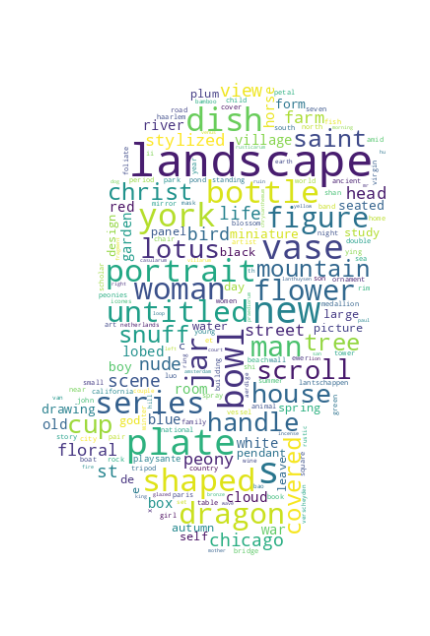

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

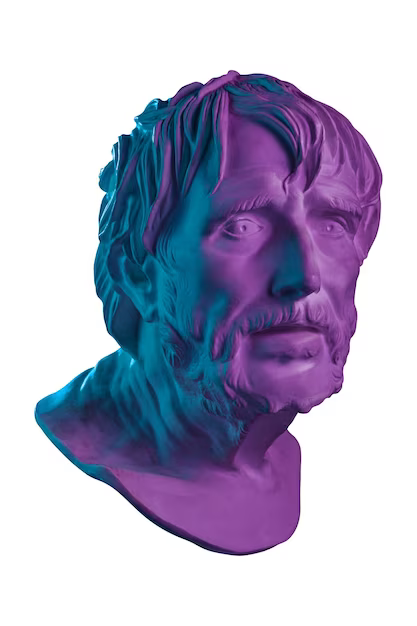

In [ ]:
from PIL import Image
image = Image.open('/content/gipsy.png')
image

In [ ]:
import numpy as np

In [ ]:
mask = np.array(image)
# print(mask)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
df['titles'].value_counts().to_dict()

{'self portrait': 21,
 'untitled': 17,
 '': 13,
 'nude new york': 13,
 'gentlewoman issue spring summer': 9,
 'landscape landscapes': 9,
 'punishment niobe plate': 8,
 'gentlewoman issue autumn winter': 8,
 'bao shi shan luo ying gem mountain luo ying plate': 6,
 'bao shi shan luo ying gem mountain luo ying b': 6,
 'untitled film': 6,
 'bao shi shan luo ying gem mountain luo ying': 5,
 'plate wise foolish virgins': 5,
 'ornament panels birds plate': 4,
 'village road plate pictures farms country houses rustic villages praediorum villarum et rusticarum casularum icones': 4,
 'life': 4,
 'cosmic symphonies': 4,
 'bao shi shan ban shan jewel mountain half mountain b': 4,
 'bao shi shan ban shan jewel mountain half mountain': 3,
 'haystacks': 3,
 'ballet students': 3,
 'drypoint number portrait': 3,
 'chicago': 3,
 'cushion cover': 3,
 'hilton head island s c usa june beach portraits': 3,
 'kolobrzeg poland july beach portraits': 3,
 'head': 3,
 'cigarette new york': 3,
 'pond': 3,
 'plate

In [ ]:
translator.translate('peach blossom spring 桃花源圖')

'peach blossom spring peach blossom spring picture'

In [ ]:
df['titles'].filter()

In [ ]:
indices_to_drop = [i for i, title in enumerate(df['titles']) if title == '']
indices_to_drop

df = df.drop(indices_to_drop).reset_index(drop=True)

[1899, 2235, 2486]

In [ ]:
df = df.drop(indices_to_drop).reset_index(drop=True)

In [ ]:
df.shape

(6143, 2)

In [ ]:
df['titles'].value_counts().to_dict()

{'self portrait no': 20,
 'untitled': 17,
 'nude no new york': 13,
 'the gentlewoman issue spring and summer': 9,
 'landscape from ten landscapes': 9,
 'the punishment of niobe plate': 8,
 'the gentlewoman issue autumn and winter': 8,
 'bao shi shan luo ying 宝石山 落英 b': 6,
 'bao shi shan luo ying 宝石山 落英 plate': 6,
 'untitled film still': 6,
 'bao shi shan luo ying 宝石山 落英 a': 5,
 'bao shi shan ban shan 宝石山 半山 b': 4,
 'ornament panels with birds plate': 4,
 'cosmic symphonies': 4,
 'bao shi shan ban shan 宝石山 半山 a': 3,
 'chicago': 3,
 'kolobrzeg poland july from beach portraits': 3,
 'ballet students': 3,
 'cushion cover': 3,
 'haystacks': 3,
 'hilton head island s c usa june from beach portraits': 3,
 'cigarette no new york': 3,
 'plate from six views in the wood of the hague': 3,
 'panel furnishing fabric': 2,
 'ring with animal mask': 2,
 'the scene no': 2,
 'belt hook': 2,
 'the table of cebes plate': 2,
 'one of a pair of yellow and iron red dragon bowls': 2,
 'libation cup': 2,
 'sti

In [ ]:
df['titles'][1899]

''

In [ ]:
for i, title in enumerate(df['titles']):
  print(f"Index: {i}, Title: {title}")
  if detect(title) != 'en':
    print(f"Language: {detect(title)}")

Index: 0, Title: lozenge composition with yellow black blue red and gray
Index: 1, Title: judith
Language: sq
Index: 2, Title: the battle between the gods and the giants
Index: 3, Title: two cows and a young bull beside a fence in a meadow
Index: 4, Title: lame beggar asking for alms from t is al verwart gaern it s already confusing
Index: 5, Title: a young man caressing the young hostess
Index: 6, Title: portrait of a sixty year old woman from recueil d estampes d après les plus célèbres tableaux de la galerie royale de dresde
Language: fr
Index: 7, Title: andromeda
Language: sv
Index: 8, Title: the marriage of the virgin
Index: 9, Title: farm near duivendrecht
Index: 10, Title: trompe l oeil still life with a flower garland and a curtain
Index: 11, Title: composition no gray red
Language: it
Index: 12, Title: mater dolorosa sorrowing virgin
Index: 13, Title: portrait of a man with a pink
Index: 14, Title: still life
Language: it
Index: 15, Title: the garden of paradise
Index: 16, Tit

LangDetectException: No features in text.

In [ ]:
detect('flesh smaller than tears are the little blue flowers')

'en'

In [ ]:
df['titles']

0                             lozenge composition with yellow black blue red and gray
1                                                                              judith
2                                          the battle between the gods and the giants
3                                two cows and a young bull beside a fence in a meadow
4       lame beggar asking for alms from t is al verwart gaern it s already confusing
                                            ...                                      
6141                                            spouted ewer with twisted rope handle
6142                                                                       chair back
6143                                                               panel trouser band
6144                                                                    child s tunic
6145                                                      fragment from a chair strip
Name: titles, Length: 6146, dtype: object

In [ ]:
df.head()

In [ ]:
detect(new)

In [ ]:
detect("Portrait of a Sixty-year-old Woman, from Recueil d’estampes d’après les plus célèbres tableaux de la Galerie Royale de Dresde")

In [ ]:
# english_titles = [title if detect(title) == 'en' else None for title in df['titles']]
# len(english_titles)

## **Checking final dataframe shape**

In [ ]:
df_shape(df)

## **Viewing final dataframe**

In [ ]:
df.head()

## **Exporting to final .csv file**

In [ ]:
df.to_csv("image_title_generation_data_noise_removed.csv", index=False)